#Hierarchical Clustering

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler #mean=0, Standard deviation =1
from scipy.spatial.distance import pdist, squareform #calculate distance between two pairs/cluster
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
df["variety"]=df["variety"].replace({"Setosa":0,"Versicolor":1,"Virginica":2})
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
features = df.select_dtypes(include=[np.number])  

In [7]:
scaler = StandardScaler() #ensure feature is distributed equally
data_scaled = scaler.fit_transform(features)  # Standardize the dataset
print(" Data Preview:")
print(pd.DataFrame(data_scaled, columns=features.columns).head())

 Data Preview:
   sepal.length  sepal.width  petal.length  petal.width   variety
0     -0.900681     1.019004     -1.340227    -1.315444 -1.224745
1     -1.143017    -0.131979     -1.340227    -1.315444 -1.224745
2     -1.385353     0.328414     -1.397064    -1.315444 -1.224745
3     -1.506521     0.098217     -1.283389    -1.315444 -1.224745
4     -1.021849     1.249201     -1.340227    -1.315444 -1.224745


In [8]:
distance_matrix = pdist(data_scaled, metric='euclidean')  # Pairwise distances

In [9]:
# Step : Perform Hierarchical Clustering
linked = linkage(data_scaled, method='ward')  # Ward's method for clustering

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


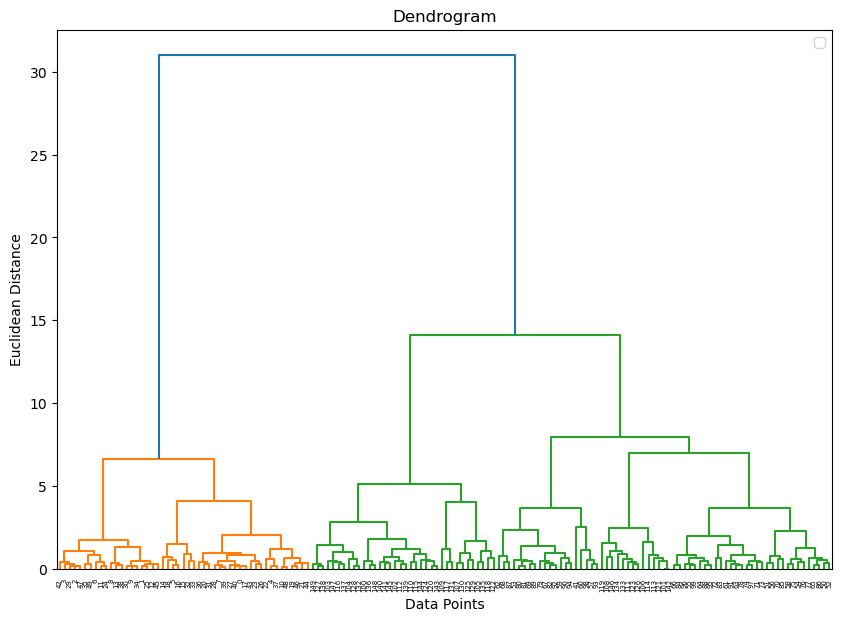

In [15]:
#Step 6: Visualize the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top', 
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.legend()
plt.show()


In [11]:
# Step 7: Determine Clusters
num_clusters = 3  # Set the number of clusters as needed
clusters = fcluster(linked, num_clusters, criterion='maxclust')

In [12]:

# Add cluster labels to the DataFrame
df['Cluster'] = clusters
print(" Cluster Assignments:")
print(df.head())

 Cluster Assignments:
   sepal.length  sepal.width  petal.length  petal.width  variety  Cluster
0           5.1          3.5           1.4          0.2        0        1
1           4.9          3.0           1.4          0.2        0        1
2           4.7          3.2           1.3          0.2        0        1
3           4.6          3.1           1.5          0.2        0        1
4           5.0          3.6           1.4          0.2        0        1


In [13]:
# Step 8: Analyze the Clusters
cluster_summary = df.groupby('Cluster').mean()
print("Summary (Feature Means):")
print(cluster_summary)

Summary (Feature Means):
         sepal.length  sepal.width  petal.length  petal.width  variety
Cluster                                                               
1            5.016327     3.451020      1.465306     0.244898      0.0
2            6.819444     3.108333      5.733333     2.105556      2.0
3            5.926154     2.732308      4.392308     1.416923      1.2


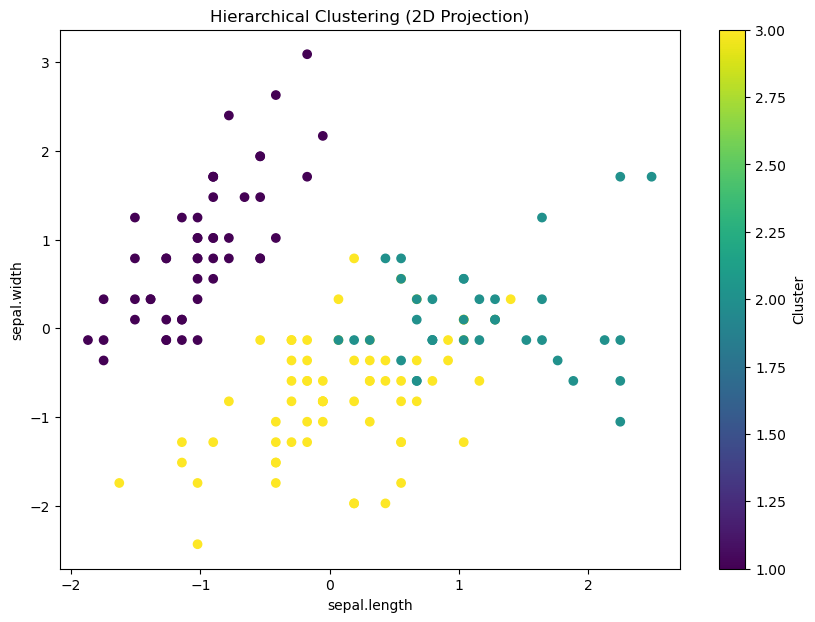

In [14]:
# Step 9: Visualize Clusters (2D using the first two features)
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering (2D Projection)')
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.colorbar(label='Cluster')
plt.show()